## Master's Project                                                                                               

### Project Phase-1 


1. import library (Pandas , numpy, matplotlib, Logistic regression, svm)
2. import datasets
3. data preprocessing
4. splitting dataset(Training and Testing  )
5. applying Model(Algorithm )
6. Finding the Accuaracy 
7. Finally prediction 
8. Data visualization 
                                          

In [ ]:
#STEP 1 : Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [161]:
#STEP 2 : Importing Datasets

dataset=pd.read_csv('/Users/tarunswarup/Downloads/Project_Vercetti/dengue.csv')
dataset.head()

,s.no,gender,age,country,state,hospital,year,temp,vomiting,eyepain,platelets,fatigue,fever,musclepain,skinrash,disease
0,1,M,3,IND,TN,APPLO,2018,104,Y,Y,90000,Y,H,Y,Y,P
1,2,M,6,IND,AP,GOVT,2018,97,N,Y,160000,N,L,N,N,N
2,3,M,5,IND,KL,GOVT,2018,98,N,N,400000,N,H,N,N,N
3,4,M,9,IND,KA,GOVT,2018,103,Y,Y,95000,N,H,Y,N,P
4,5,F,10,IND,KA,GOVT,2018,97,N,N,200000,N,L,N,N,N


In [162]:
#STEP 3 : Data Preprocessing

from sklearn.preprocessing import LabelEncoder
columnlist=['vomiting','eyepain','fatigue','fever','musclepain','skinrash','disease']
for i in columnlist:
        labelencoder_X=LabelEncoder()
        dataset[i]=labelencoder_X.fit_transform(dataset[i])

#### The dataset looks like this after LabelEncoder has worked on it . The attributes with categorical values were converted to binary so that the machine learns better.

In [129]:
print(dataset.head())

   s.no gender  age country state hospital  year  temp  vomiting  eyepain  \
0     1      M    3     IND    TN    APPLO  2018   104         1        1   
1     2      M    6     IND    AP     GOVT  2018    97         0        1   
2     3      M    5     IND    KL     GOVT  2018    98         0        0   
3     4      M    9     IND    KA     GOVT  2018   103         1        1   
4     5      F   10     IND    KA     GOVT  2018    97         0        0   

   platelets  fatigue  fever  musclepain  skinrash  disease  
0      90000        1      0           1         1        1  
1     160000        0      1           0         0        0  
2     400000        0      0           0         0        0  
3      95000        0      0           1         0        1  
4     200000        0      1           0         0        0  


In [163]:
X=dataset.iloc[ :,7:-1]

In [164]:
X.head()

,temp,vomiting,eyepain,platelets,fatigue,fever,musclepain,skinrash
0,104,1,1,90000,1,0,1,1
1,97,0,1,160000,0,1,0,0
2,98,0,0,400000,0,0,0,0
3,103,1,1,95000,0,0,1,0
4,97,0,0,200000,0,1,0,0


In [165]:
Y=dataset.iloc[:,15:]


In [166]:
Y.head()

,disease
0,1
1,0
2,0
3,1
4,0


In [167]:
#STEP 4 : Splitting the Dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size =0.2,random_state=0)

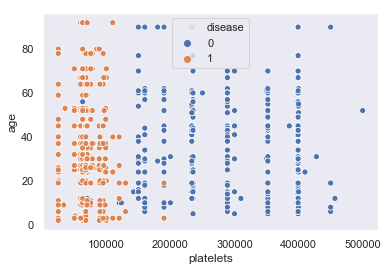

In [135]:
sns.set(style="dark")
sns.scatterplot(x="platelets", y="age",hue="disease",data=dataset);

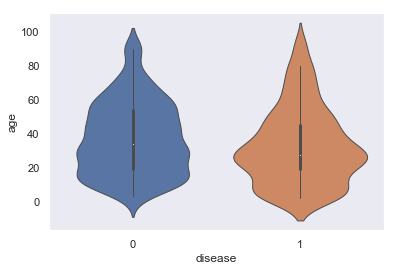

In [136]:
sns.violinplot( x=dataset["disease"], y=dataset["age"], linewidth=1)


In [168]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,temp,vomiting,eyepain,platelets,fatigue,fever,musclepain,skinrash
temp,1,0.395742,0.309554,-0.588631,0.627732,-0.368608,0.280895,0.564784
vomiting,0.395742,1,0.0496838,-0.58284,0.689693,-0.50452,0.401038,0.578114
eyepain,0.309554,0.0496838,1,-0.274863,0.27345,0.400035,-0.278656,0.22758
platelets,-0.588631,-0.58284,-0.274863,1,-0.784981,0.311742,-0.555228,-0.768326
fatigue,0.627732,0.689693,0.27345,-0.784981,1,-0.305856,0.513355,0.865198
fever,-0.368608,-0.50452,0.400035,0.311742,-0.305856,1,-0.226348,-0.270233
musclepain,0.280895,0.401038,-0.278656,-0.555228,0.513355,-0.226348,1,0.622516
skinrash,0.564784,0.578114,0.22758,-0.768326,0.865198,-0.270233,0.622516,1


In [ ]:
# f = plt.figure(figsize=(13, 9))
# plt.matshow(X.corr(), fignum=f.number)
# plt.xticks(range(X.shape[1]), X.columns, fontsize=14)
# plt.yticks(range(X.shape[1]), X.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=10)
# plt.title('Correlation Matrix', fontsize=12);

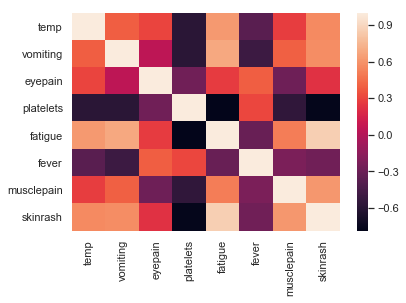

In [169]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [170]:
from sklearn import svm
c1 = svm.SVC(kernel='linear', C = 1.0)

#clf.fit(x,y)
c1.fit(X_train,Y_train)

/Users/tarunswarup/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [171]:
Y1_pred = c1.predict(X_test)

In [172]:
from sklearn.metrics import roc_auc_score,accuracy_score
Y1_pred=c1.predict(X_test)
print ("AUC:",roc_auc_score(Y_test,Y1_pred))
print(Y1_pred)
print()
# a = accuracy_score(Y_test,Y1_pred)
# print(a)

AUC: 0.9415064102564101
[1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0]



In [173]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,Y1_pred))
print(classification_report(Y_test,Y1_pred))

[[94  2]
 [10 94]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        96
           1       0.98      0.90      0.94       104

   micro avg       0.94      0.94      0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [174]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=200)
clf.fit(X_train,Y_train)

/Users/tarunswarup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [176]:
import pandas as pd
columns=['temp','vomiting','eyepain','platelets','fatigue','fever','musclepain','skinrash']

df_1 = pd.DataFrame(X_train, columns=columns)
# print(X_train.shape)
# X_train.view()
df_1.head()

,temp,vomiting,eyepain,platelets,fatigue,fever,musclepain,skinrash
687,95,1,0,160001,0,0,0,0
500,98,0,1,142356,1,1,0,1
332,98,0,0,399255,0,0,0,0
979,98,0,0,399255,0,0,0,0
817,99,1,0,68000,1,0,1,1


In [177]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = df_1.columns, columns = ['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
platelets,0.369425
fatigue,0.205269
skinrash,0.176060
temp,0.100233
musclepain,0.070825
vomiting,0.046304
eyepain,0.020197
fever,0.011686


In [65]:
#col = dataset.iloc[ :,[8,9,12,13]]

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size =0.2,random_state=0)

In [178]:
#Building the Model
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
H=regressor.fit(X_train,Y_train)


/Users/tarunswarup/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tarunswarup/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [179]:
Y_pred = regressor.predict(X_test) 
Y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0])

In [180]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[ 94,   2],
       [  4, 100]])

In [181]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
aucry=roc_auc_score(Y_test,Y_pred)

print("ACC:",aucry)

ACC: 0.9703525641025642


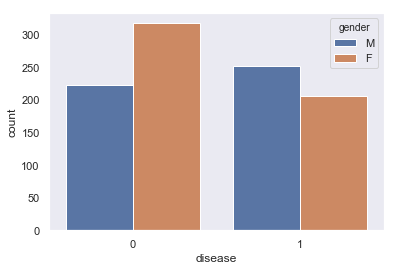

In [182]:
sns.countplot(x='disease',hue='gender',data=dataset)


In [183]:
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[ 94   2]
 [  4 100]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        96
           1       0.98      0.96      0.97       104

   micro avg       0.97      0.97      0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [184]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.97
Precision: 0.9803921568627451
Recall: 0.9615384615384616


ACC: 0.9703525641025642


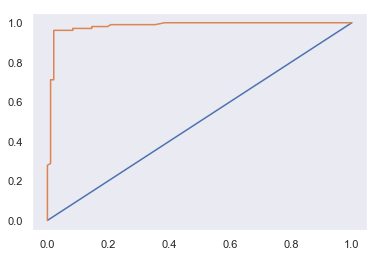

In [185]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
aucry=roc_auc_score(Y_test,Y_pred)

print("ACC:",aucry)
probs = regressor.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='-')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()

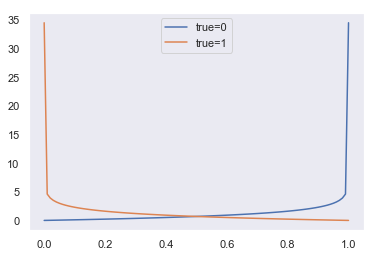

In [186]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from numpy import array

loss = log_loss(Y_test, probs)



# predictions as 0 to 1 in 0.01 increments
yhat = [x*0.01 for x in range(0, 101)]
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in yhat]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in yhat]
# plot input to loss
pyplot.plot(yhat, losses_0, label='true=0')
pyplot.plot(yhat, losses_1, label='true=1')
pyplot.legend()
pyplot.show()


In [187]:
loss

0.16678503114384033

### Phase-2 (IoT Intergration )

Steps 1-4:

1. Install required IoT library 
2. Create widgets
3. note down the Token Keys and variable Keys 
4. deploy the Model 



In [188]:
import sys

In [189]:
from ubidots import ApiClient

In [190]:
api = ApiClient(token="A1E-1RiuZrHDsVkCXfXJhEYXro5JqT6gXllJfNUnRdrAOnj4zAvSFZZKCzrF")

variable1 = api.get_variable("5d3daca7c03f9752cfa4d75b")
variable2 = api.get_variable("5d550d04c03f9708d88d0db7") # longitude
variable3 = api.get_variable("5d550cf5c03f9708bbf50f1d")
variable4 = api.get_variable("5d550ed0c03f9709ddb82928")

In [191]:
s = input("enter dengue inputs Symptoms : ") 
x = list(map(int, s.split())) 
print(x) 

#prediction 
# 102 0 0 160000 0 1 0 0 --0(Normal)
# 102 0 0 60000 0 1 0 0 --1(Critical)
Y_pred = regressor.predict([x]) 
print(Y_pred) 
Y_pred

enter dengue inputs Symptoms : 102 0 0 160000 0 1 0 0
[102, 0, 0, 160000, 0, 1, 0, 0]
[0]


array([0])

In [192]:
import requests
import json
import urllib.request
import urllib.parse

apikey='ce+/p8DI1mg-g6u3BB4FpqOeMGAn8q8HH7so6eYZDI'
numbers=('3530894323227')
sender='Alert TXTLCL'
message='Patient is critical due to dengue fever'
username = 'tarunhighv@icloud.com'

def sendSMS(apikey, numbers, sender, message):
    data =  urllib.parse.urlencode({'username':username,'apikey': apikey, 'numbers': numbers,
        'message' : message, 'sender': sender})
    data = data.encode('utf-8')
    request = urllib.request.Request("https://api.txtlocal.com/send/?")
    f = urllib.request.urlopen(request, data)
    fr = f.read()
    return(fr)

In [159]:
if Y_pred[0] ==1:
    a=1
    variable1.save_value({'value':a})
    print("Patient is critical")
    send_url = "http://api.ipstack.com/31.193.221.194?access_key=76ea36786367e229e3a80033709d21e2"
    geo_req = requests.get(send_url)
    geo_json = json.loads(geo_req.text)
    latitude = geo_json['latitude']
    longitude = geo_json['longitude']
    variable2.save_value({'value':longitude})
    variable3.save_value({'value':latitude})
    variable4.save_value({"value":10,"context":{"lat":latitude,"lng":longitude}})
    city = geo_json['city']
    resp =  sendSMS(apikey, numbers,sender, message)
    print (resp)
    print("Latitude : ",latitude)
    print("Longitude : ",longitude)
    print(city)
else:
    b=0
    variable1.save_value({'value':b})
    print("patient is normal ")

patient is normal 
